<a href="https://colab.research.google.com/github/Agungdecoco/Predicted-Procurement-Angkringan-With-Support-Vector-Regression/blob/main/angkringan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicted Procurement Angkringan With Support Vector Regression For Decreasing Loss Food**

## preparation of library

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import random
import math
from google.colab import files

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error as mape

## preparation of dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
import matplotlib.pyplot
from google.auth import default
creds,_ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('dataset_angkringan').worksheet("dataset_fix")
dataset = worksheet.get_all_values()
# dataset # all dataset
dataset

[['Tanggal', 'Terjual', 'Tersisa', 'Pengadaan'],
 ['01/07/2021', '70', '32', '102'],
 ['02/07/2021', '66', '39', '105'],
 ['03/07/2021', '23', '78', '101'],
 ['04/07/2021', '24', '79', '103'],
 ['05/07/2021', '46', '57', '103'],
 ['06/07/2021', '58', '42', '100'],
 ['07/07/2021', '25', '73', '98'],
 ['08/07/2021', '54', '49', '103'],
 ['09/07/2021', '33', '68', '101'],
 ['10/07/2021', '28', '77', '105'],
 ['11/07/2021', '28', '75', '103'],
 ['12/07/2021', '95', '0', '95'],
 ['13/07/2021', '48', '49', '97'],
 ['14/07/2021', '79', '16', '95'],
 ['15/07/2021', '60', '38', '98'],
 ['16/07/2021', '47', '48', '95'],
 ['17/07/2021', '72', '25', '97'],
 ['18/07/2021', '33', '65', '98'],
 ['19/07/2021', '38', '64', '102'],
 ['20/07/2021', '64', '41', '105'],
 ['21/07/2021', '56', '42', '98'],
 ['22/07/2021', '77', '25', '102'],
 ['23/07/2021', '74', '28', '102'],
 ['24/07/2021', '29', '67', '96'],
 ['25/07/2021', '61', '42', '103'],
 ['26/07/2021', '32', '63', '95'],
 ['27/07/2021', '45', '52',

In [ ]:
data = pd.DataFrame(dataset)
data.columns = data.iloc[0]
data = data.iloc[1:].reset_index(drop=True)
data['Tanggal'] = pd.to_datetime(data['Tanggal'], dayfirst=True).astype('datetime64[ns]')
data['Terjual'] = pd.to_numeric(data['Terjual'].fillna(0).astype('int64'))
data['Tersisa'] = pd.to_numeric(data['Tersisa'].fillna(0).astype('int64'))
data['Pengadaan'] = pd.to_numeric(data['Pengadaan'].fillna(0).astype('int64'))
data = data.loc[(data['Tanggal'] >= '01-07-2021') & #01-07-2021 30-03-2022
                (data['Tanggal'] <= '30-03-2022')]
data = data.set_index('Tanggal')

print(sum(data['Pengadaan'].values))
print(len(data))
trainsize = len(data) * 0.6
testsize = len(data) * 0.35
efisiensisize = len(data) * 0.05

display(pd.DataFrame({"Total":[len(data)],"Train":[round(trainsize)], # x < 12-12-2021 
                      "Test":[round(testsize)], # 12-12-2021 =< x < 18-03-2022
                      "Efisiensi":[round(efisiensisize)]})) # x >= 18-03-2022
print(trainsize+testsize+efisiensisize)

27319
273


,Total,Train,Test,Efisiensi
0,273,164,96,14


272.99999999999994


In [ ]:
# data = pd.DataFrame(dataset, columns=['Date', 'Demand', 'Waste', 'Stock'])
# data['Date'] = pd.to_datetime(data['Date'], dayfirst=True).astype('datetime64[ns]')
# # data['Date'] = data.Date.dt.day
# data['Demand'] = pd.to_numeric(data['Demand'].fillna(0).astype('int64'))
# data['Waste'] = pd.to_numeric(data['Waste'].fillna(0).astype('int64'))
# data['Stock'] = pd.to_numeric(data['Stock'].fillna(0).astype('int64'))
# data = data.loc[(data['Date'] >= '01-07-2021') & #01-07-2021 30-03-2022
#                 (data['Date'] <= '30-03-2022')]
# data = data.set_index('Date')

# print(len(data))
# trainsize = len(data) * 0.6
# testsize = len(data) * 0.35
# efisiensisize = len(data) * 0.05

# display(pd.DataFrame({"Total":[len(data)],"Train":[round(trainsize)], # x < 12-12-2021 
#                       "Test":[round(testsize)], # 12-12-2021 =< x < 18-03-2022
#                       "Efisiensi":[round(efisiensisize)]})) # x >= 18-03-2022
# print(trainsize+testsize+efisiensisize)

In [ ]:
data

,Terjual,Tersisa,Pengadaan
Tanggal,,,
2021-07-01,70,32,102
2021-07-02,66,39,105
2021-07-03,23,78,101
2021-07-04,24,79,103
2021-07-05,46,57,103
...,...,...,...
2022-03-26,56,46,102
2022-03-27,34,68,102
2022-03-28,38,63,101


In [ ]:
# penjualanSeries = pd.Series(data.index)
stockSeries = pd.Series(data['Pengadaan'])
demandSeries = pd.Series(data['Terjual'])
wasteSeries = pd.Series(data['Tersisa'])
demandDateSeries = pd.Series(data.index)
# print(demandDateSeries)
# display(data)

## the demand angkringan visualization

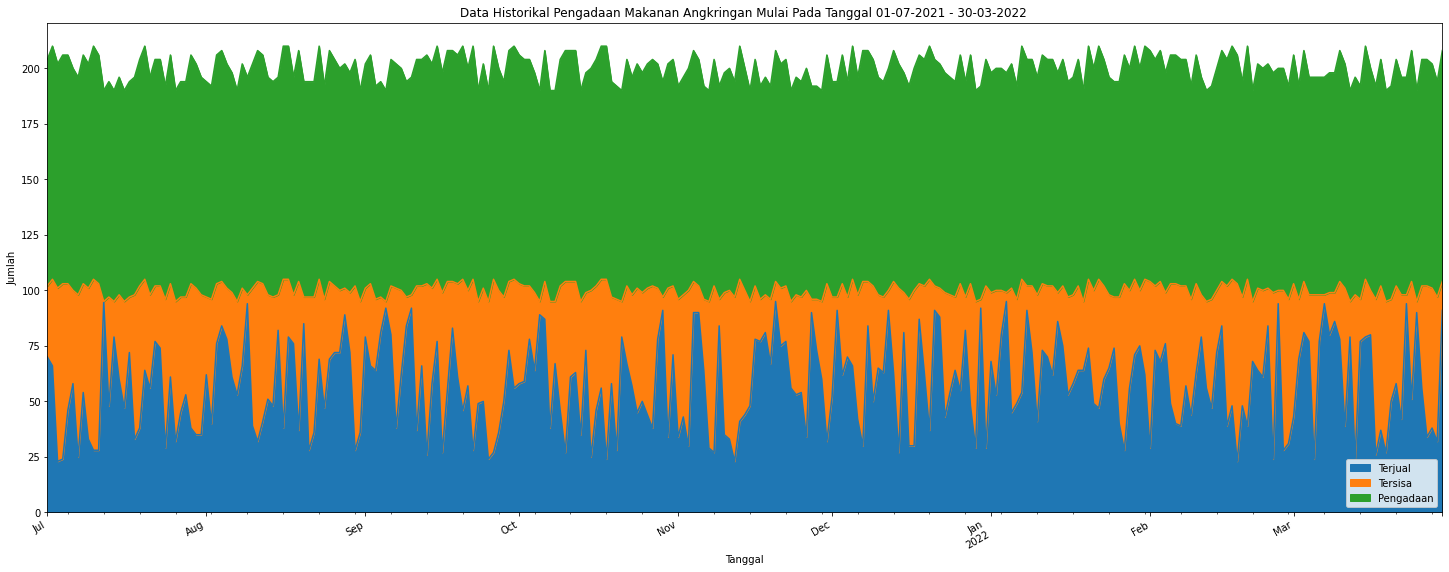

In [ ]:
# plt.figure(figsize=(25,10))
# plt.scatter(demandDateSeries.values, demandSeries.values, color='black', marker='*', label='Titik Fluktuasi Penjualan')
# plt.bar(data.values, stacked=True, label='Data Terjual')
fig, ax = plt.subplots(figsize=(25, 10))
data.plot(kind='area', ax = ax, stacked=True, title='Data Historikal Pengadaan Makanan Angkringan Mulai Pada Tanggal 01-07-2021 - 30-03-2022 ')
plt.gcf().autofmt_xdate()
plt.xlabel("Tanggal", fontsize=10)
plt.ylabel("Jumlah", fontsize=10)
plt.margins(0.03)
plt.legend()
plt.show()

**this research is focus with predicting the demand for decrease of stocking food for better storaging in angkringan. The eficiency measurement are both of predict demand gap of the amount of stock is toward to decrease of increase**

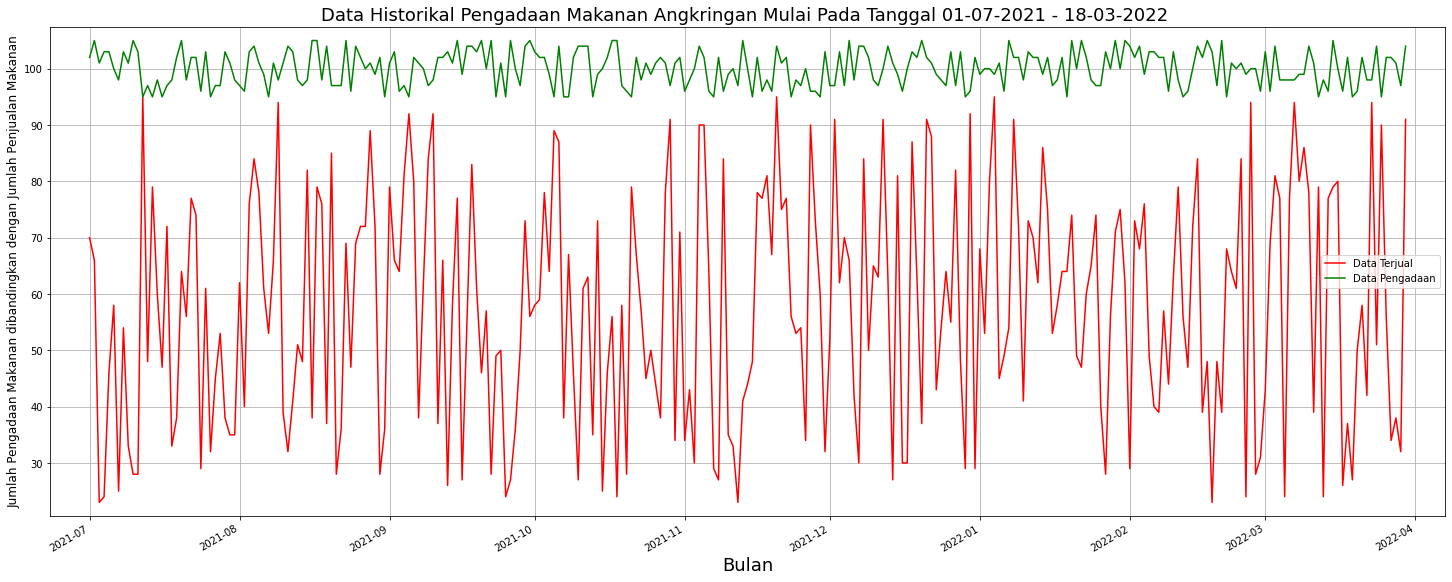

In [ ]:
plt.figure(figsize=(25,10))
# plt.scatter(demandDateSeries.values, demandSeries.values, color='black', marker='*', label='Titik Fluktuasi Penjualan')
plt.plot(demandDateSeries.values, demandSeries.values, color='red', label='Data Terjual')
# plt.plot(demandDateSeries.values, wasteSeries.values, color='blue', label='Data Sisa Penjualan')
plt.plot(demandDateSeries.values, stockSeries.values, color='green', label='Data Pengadaan')
plt.grid()

plt.gcf().autofmt_xdate()

plt.xlabel("Bulan", fontsize=18)
plt.ylabel("Jumlah Pengadaan Makanan dibandingkan dengan Jumlah Penjualan Makanan", fontsize=12)
plt.margins(0.03)
plt.title("Data Historikal Pengadaan Makanan Angkringan Mulai Pada Tanggal 01-07-2021 - 18-03-2022 ", fontsize=18)
plt.legend()
plt.show()

# plt.savefig('foo.png')
# files.download("foo.png")

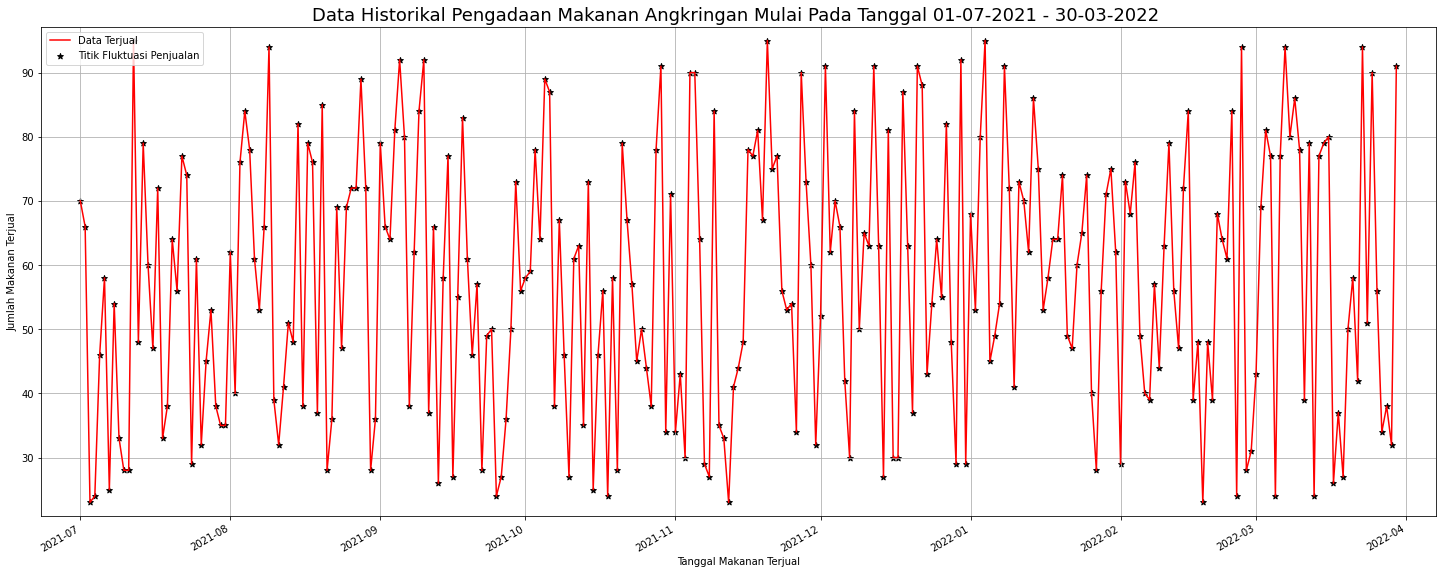

In [ ]:
plt.figure(figsize=(25,10))
plt.scatter(demandDateSeries.values, demandSeries.values, color='black', marker='*', label='Titik Fluktuasi Penjualan')
plt.plot(demandDateSeries.values, demandSeries.values, color='red', label='Data Terjual')
# plt.plot(demandDateSeries.values, wasteSeries.values, color='blue', label='Data Sisa Penjualan')
# plt.plot(demandDateSeries.values, stockSeries.values, color='green', label='Data Pengadaan')
plt.grid()

plt.gcf().autofmt_xdate()

plt.xlabel("Tanggal Makanan Terjual", fontsize=10)
plt.ylabel("Jumlah Makanan Terjual", fontsize=10)
plt.margins(0.03)
plt.title("Data Historikal Pengadaan Makanan Angkringan Mulai Pada Tanggal 01-07-2021 - 30-03-2022 ", fontsize=18)
plt.legend()
plt.show()

# plt.savefig('foo.png')
# files.download("foo.png")

## preparation of dataset (preprocessing)

### split dataset into training 60%, testing 35% and efficient of satay 5%

In [ ]:
train = data.copy()[(data.index >= '01-07-2021') & (data.index < '12-12-2021')][['Terjual']]
test = data.copy()[(data.index >= '12-12-2021') & (data.index < '3-18-2022')][['Terjual']]
efficient = data.copy()[data.index >= '3-18-2022'][['Terjual']]

print('Training Data Shape: ', train.shape)
print('Test Data Shape: ', test.shape)
print('Estimate Efisiensi Shape: ', efficient.shape)
print(len(train)+len(test)+len(efficient))

Training Data Shape:  (164, 1)
Test Data Shape:  (96, 1)
Estimate Efisiensi Shape:  (13, 1)
273


## feature scaling

### standard scaling

In [ ]:
# from sklearn.preprocessing import StandardScaler

# print(train['Demand'][0])

# mStandardScaler = StandardScaler()
# trainStandardScale = mStandardScaler.fit_transform(train['Demand'].values.reshape(-1, 1))
# testStandardScale = mStandardScaler.fit_transform(test['Demand'].values.reshape(-1, 1))

# print(trainStandardScale[0], testStandardScale[0])

# sTrainStandardScale = mStandardScaler.inverse_transform(trainStandardScale)

# print(sTrainStandardScale[0])

### min max scaling

In [ ]:
# print(train['Demand'][0])

# mMinMaxScaler = MinMaxScaler()
# trainMinMaxScale = mMinMaxScaler.fit_transform(train['Demand'].values.reshape(-1, 1))
# testMinMaxScale = mMinMaxScaler.fit_transform(test['Demand'].values.reshape(-1, 1))

# print(trainMinMaxScale[0], testMinMaxScale[0])

# mTrainStandardScale = mStandardScaler.inverse_transform(trainMinMaxScale)

# print(mTrainStandardScale[0])

### sliding window dataset size (3, 5)
references : https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5


In [ ]:
# def sliding_window(data, windowSize):
#   if len(data) < windowSize:
#       return "dataset is should be more than window size"

#   result = []
#   for i in range(len(data) - windowSize):    
#     result.append([data[i:(i+windowSize)-1], data[i:i+windowSize][-1]])
#   return result 

In [ ]:
# def convertTable(data):
#   predictList = []
#   targetList = []
#   for index in range(len(data)):
#     predictList.append(data[index][0])
#     targetList.append(data[index][1])

#   return pd.DataFrame({"Predictor": predictList, "Target": targetList})

In [ ]:
# dataTrainThree = sliding_window(trainStandardScale, 3)
# dataTestThree = sliding_window(testStandardScale, 3)

# dataTrainFive = sliding_window(trainStandardScale, 5)
# dataTestFive = sliding_window(testStandardScale, 5)

# dataTrainThree = convertTable(dataTrainThree)
# dataTestThree = convertTable(dataTestThree)

# dataTrainFive = convertTable(dataTrainFive)
# dataTestFive = convertTable(dataTestFive)

# display(dataTrainThree)

In [ ]:
# dataTrainThree = sliding_window(trainMinMaxScale, 3)
# dataTestThree = sliding_window(testMinMaxScale, 3)

# dataTrainFive = sliding_window(trainMinMaxScale, 5)
# dataTestFive = sliding_window(testMinMaxScale, 5)

# tableTrainThree = convertTable(dataTrainThree)
# tableTestThree = convertTable(dataTestThree)

# tableTrainFive = convertTable(dataTrainFive)
# tableTestFive = convertTable(dataTestFive)

## modeling using support vector regression

In [ ]:
# xTrainThree, yTrainThree = tableTrainThree['Predictor'], tableTrainThree['Target']
# xTestThree, yTestThree = tableTestThree['Predictor'], tableTestThree['Target']

# # print(xTrainThree.values)
# # print(yTrainThree.values)

# # # xTrainFive, yTrainFive = dataTrainFive['Predictor'], dataTrainFive['Target']
# # # xTestFive, yTestFive = dataTestFive['Predictor'], dataTestFive['Target']

# # # print(train[3:164].shape, yTrainThree.shape)
# # print(xTrainThree[0])
# # print(yTrainThree[0])
# # print(xTrainThree.tolist()[0:3])

In [ ]:
# import numpy as np

# modelLinear = SVR(kernel='linear',gamma='auto', C=100) # kernel linear
# modelRbf = SVR(kernel='rbf',gamma=0.1, C=100, epsilon = 0.01) # kernel non linear

# # print(xTrainThree.tolist())
# # print(np.reshape(xTrainThree.tolist(), (-1, 1)))

# yTrainLinearPredict = modelLinear.fit(xTrainThree.tolist(), np.reshape(yTrainThree.tolist(), (-1, 1)))
# # yTestLinearPredict = modelLinear.fit(xTestThree, yTestThree).predict(xTestThree.tolist())

# print(yTrainLinearPredict)
# # print(len(yTrainLinearPredict), len(yTestLinearPredict))

## Visualize Model with Kernel Linear & Radial Basis Functoin
references: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html

In [ ]:
# lw = 2

# svrs = [modelLinear, modelRbf]
# kernel_label = ["Linear", "RBF"]
# model_color = ["g", "b"]

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(35, 10), sharey=True)
# for ix, svr in enumerate(svrs):
#     axes[ix].plot(
#         y_train[:,0], yTrainLinearScale,
#         color=model_color[ix],
#         lw=lw,
#         label="{} model".format(kernel_label[ix]),
#     )
#     axes[ix].scatter(
#         train['Demand'][3:164][svr.support_],
#         yTrainThree[svr.support_],
#         facecolor="none",
#         edgecolor=model_color[ix],
#         s=50,
#         label="{} support vectors".format(kernel_label[ix]),
#     )
#     axes[ix].legend(
#         loc="upper center",
#         bbox_to_anchor=(0.5, 1.1),
#         ncol=1,
#         fancybox=True,
#         shadow=True,
#     )

# fig.text(0.5, 0.04, "data", ha="center", va="center")
# fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
# fig.suptitle("Support Vector Regression", fontsize=14)
# plt.show()

## references coding and modification

In [ ]:
# sScaler = StandardScaler()

# print(train.values[0])

# train['Demand'] = sScaler.fit_transform(train)
# test['Demand'] = sScaler.fit_transform(test)

# print(train['Demand'][0])

# train['Standard'] = sScaler.inverse_transform([train['Demand']]).reshape(-1, 1)

# print(train['Standard'][0])

In [ ]:
mScaler = MinMaxScaler()
train['Convert'] = mScaler.fit_transform(train)
test['Convert'] = mScaler.fit_transform(test)
efficient['Convert'] = mScaler.fit_transform(efficient)

# print(train.values[0])
# print(train['Demand'][0])

# train['Predict'] = mScaler.inverse_transform([train['Demand']]).reshape(-1, 1)

# print(train['Predict'][0])

print(train.shape)
print(test.shape)
print(efficient.shape)
# print(train[0:3], test[0:3])
# print(train.values[0], train['Convert'][0])
display(efficient)

(164, 2)
(96, 2)
(13, 2)


,Terjual,Convert
Tanggal,,
2022-03-18,37,0.149254
2022-03-19,27,0.000000
2022-03-20,50,0.343284
2022-03-21,58,0.462687
2022-03-22,42,0.223881
2022-03-23,94,1.000000
2022-03-24,51,0.358209
2022-03-25,90,0.940299
2022-03-26,56,0.432836


In [ ]:
train_data = train.values
test_data = test.values
efficient_data = efficient.values

print(train_data[0:3], test_data[0:3], efficient_data[0:3])

[[70.          0.65277778]
 [66.          0.59722222]
 [23.          0.        ]] [[9.10000000e+01 9.44444444e-01]
 [6.30000000e+01 5.55555556e-01]
 [2.70000000e+01 5.55555556e-02]] [[37.          0.14925373]
 [27.          0.        ]
 [50.          0.34328358]]


In [ ]:
timesteps = 7 # steps : 3, 5

In [ ]:
# Converting training data to 2D tensor using nested list comprehension: 
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(0,len(train_data)-timesteps+1)])[:,:,1]
train_data_timesteps.shape
# train_data_timesteps[0:3]

(158, 7)

In [ ]:
# Converting testing data to 2D tensor:
test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,1]
test_data_timesteps.shape
# test_data_timesteps[0:3]

(90, 7)

In [ ]:
# Converting testing data to 2D tensor:
efficient_data_timesteps=np.array([[j for j in efficient_data[i:i+timesteps]] for i in range(0,len(efficient_data)-timesteps+1)])[:,:,1]
efficient_data_timesteps.shape
# efficient_data_timesteps[0:3]

(7, 7)

In [ ]:
# Selecting inputs and outputs from training and testing data:
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]
# x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

# print(x_train[:,0], y_train[:,0])
# print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_train[0:3], y_train[:,0][0:3])

(90, 6) (90, 1)
[[0.65277778 0.59722222 0.         0.01388889 0.31944444 0.48611111]
 [0.59722222 0.         0.01388889 0.31944444 0.48611111 0.02777778]
 [0.         0.01388889 0.31944444 0.48611111 0.02777778 0.43055556]] [0.02777778 0.43055556 0.13888889]


In [ ]:
# implement SVR
modelLinear = SVR(kernel='linear',gamma='auto', C=100)
modelRbf = SVR(kernel='rbf',gamma=0.1, C=100, epsilon = 0.01)
# modelPoly = SVR(kernel='poly',gamma=0.5, C=10, epsilon = 0.05)
# modelSigmoid = SVR(kernel='sigmoid',gamma=0.5, C=10, epsilon = 0.05)
# modelPrecomputed = SVR(kernel='precomputed',gamma=0.5, C=10, epsilon = 0.05)

# fit the model on training data
modelLinear.fit(x_train, y_train[:,0])
modelRbf.fit(x_train, y_train[:,0])
# modelPoly.fit(x_train, y_train[:,0])
# modelSigmoid.fit(x_train, y_train[:,0])
# modelPrecomputed.fit(x_train, y_train[:,0])

# make model linear prediction
yTrainLinear = modelLinear.predict(x_train).reshape(-1, 1)
print(yTrainLinear[0], y_train[:,0][0])

# make model rbf prediction
yTrainRbf = modelRbf.predict(x_train).reshape(-1, 1)
print(yTrainRbf[0], y_train[:,0][0])

[0.49478936] 0.02777777777777779
[0.23439417] 0.02777777777777779


In [ ]:
# print(x_train[0:3], x_test[0:3])
# print(y_train[0:3], y_test[0:3])

# Scaling the original values
xTrain = mScaler.inverse_transform(x_train)
yTrain = mScaler.inverse_transform(y_train)

print("before inverse : train actual {} | target {} ".format(x_train[0:3], y_train[0:3]))
print("after inverse : train actual {} | target {} ".format(xTrain[0:3], yTrain[0:3]))

# scaling the predictions
yTrainLinearScale = mScaler.inverse_transform(yTrainLinear).reshape(-1, 1)

yTrainRbfScale = mScaler.inverse_transform(yTrainRbf).reshape(-1, 1)

# print("before inverse : train predict linear {} | rbf {}".format(yTrainLinear[0], yTrainRbf[0]))
# print("after inverse : train predict linear {} | rbf {}".format(yTrainLinearScale[0], yTrainRbfScale[0]))
# print("after inverse : test predict linear {} | rbf {}".format(yTestLinear[0], yTestRbf[0]))
# # print(x_train.shape, y_test.shape)
# # print(x_train.reshape(-1, 1).shape, y_train.reshape(-1, 1).shape)

before inverse : train actual [[0.65277778 0.59722222 0.         0.01388889 0.31944444 0.48611111]
 [0.59722222 0.         0.01388889 0.31944444 0.48611111 0.02777778]
 [0.         0.01388889 0.31944444 0.48611111 0.02777778 0.43055556]] | target [[0.02777778]
 [0.43055556]
 [0.13888889]] 
after inverse : train actual [[70.73611111 67.01388889 27.         27.93055556 48.40277778 59.56944444]
 [67.01388889 27.         27.93055556 48.40277778 59.56944444 28.86111111]
 [27.         27.93055556 48.40277778 59.56944444 28.86111111 55.84722222]] | target [[28.86111111]
 [55.84722222]
 [36.30555556]] 


In [ ]:
# Check model performance on training and testing data
train_timestamps = data[(data.index < '12-12-2021') & (data.index >= '01-07-2021')].index[timesteps-1:] #data[(data.index < '12-12-2021') & (data.index >= '01-07-2021')].index[timesteps-1:]
test_timestamps = data[(data.index < '03-18-2022') & (data.index >= '12-12-2021')].index[timesteps-1:]
efficient_timestamps = data[(data.index <= '30-03-2022') & (data.index >= '03-18-2022')].index[timesteps-1:]

# print(train_timestamps)
# print(y_train)
print(len(train_timestamps), len(test_timestamps), len(efficient_timestamps))
print(len(train_timestamps), len(test_timestamps), len(efficient_timestamps))

158 90 7
158 90 7


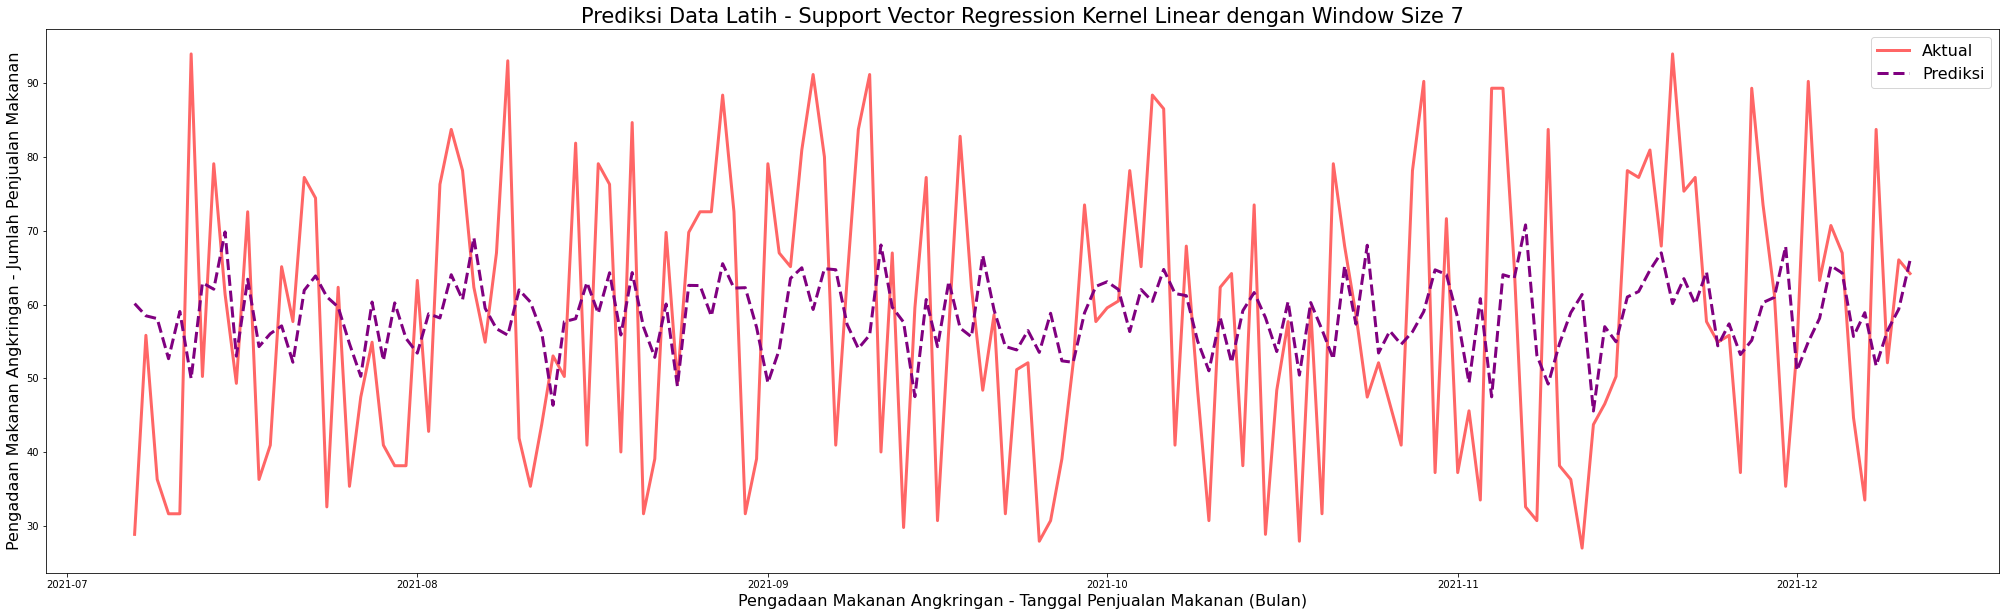

In [ ]:
plt.figure(figsize=(35,10))
plt.plot(train_timestamps, yTrain, color = 'red', linewidth=3.0, alpha = 0.6)
plt.plot(train_timestamps, yTrainLinearScale, linestyle='--', color ='purple', linewidth=3.0)
plt.legend(['Aktual', 'Prediksi'], fontsize=16)
plt.xlabel('Pengadaan Makanan Angkringan - Tanggal Penjualan Makanan (Bulan)', fontsize=16)
plt.ylabel('Pengadaan Makanan Angkringan - Jumlah Penjualan Makanan', fontsize=16)
plt.title("Prediksi Data Latih - Support Vector Regression Kernel Linear dengan Window Size "+str(timesteps), fontsize=21)
plt.show()

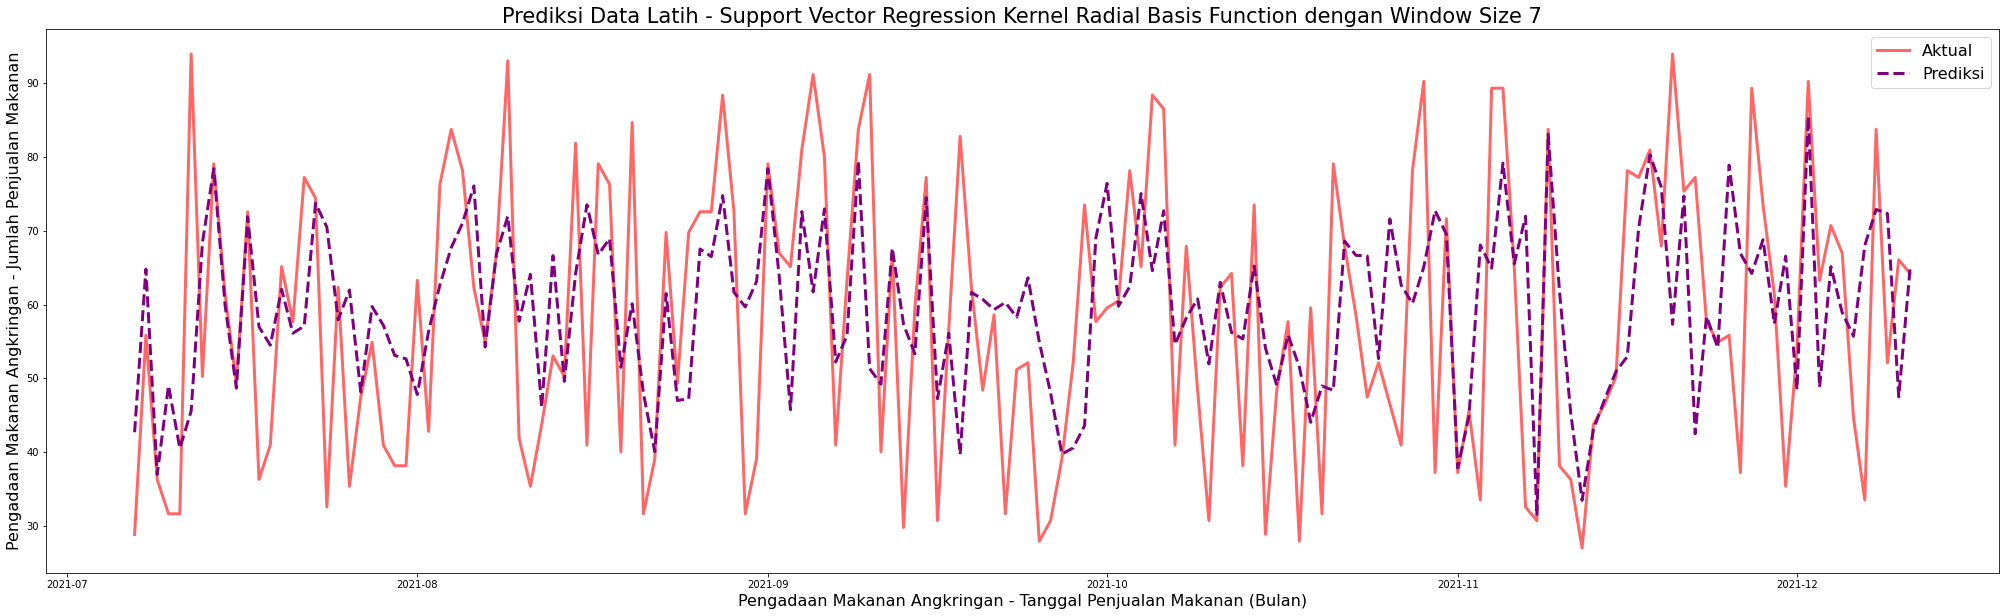

In [ ]:
plt.figure(figsize=(35,10))
plt.plot(train_timestamps, yTrain, color = 'red', linewidth=3.0, alpha = 0.6)
plt.plot(train_timestamps, yTrainRbfScale, color = 'purple', linestyle='--', linewidth=3.0)
plt.legend(['Aktual', 'Prediksi'], fontsize=16)
plt.xlabel('Pengadaan Makanan Angkringan - Tanggal Penjualan Makanan (Bulan)', fontsize=16)
plt.ylabel('Pengadaan Makanan Angkringan - Jumlah Penjualan Makanan', fontsize=16)
plt.title("Prediksi Data Latih - Support Vector Regression Kernel Radial Basis Function dengan Window Size "+str(timesteps), fontsize=21)
plt.show()

In [ ]:
xTest = mScaler.inverse_transform(x_test)
yTest = mScaler.inverse_transform(y_test)
print("before inverse : train actual {} length {}".format(x_test[0:3], len(x_test)))
print("after inverse : test actual {} length {}".format(xTest[0:3], len(xTest)))


# fit the model on training data
modelLinear.fit(x_test, y_test[:,0])
modelRbf.fit(x_test, y_test[:,0])
# modelPoly.fit(x_train, y_train[:,0])
# modelSigmoid.fit(x_train, y_train[:,0])
# modelPrecomputed.fit(x_train, y_train[:,0])

# make model linear prediction
yTestLinear = modelLinear.predict(x_test).reshape(-1, 1)
print(yTestLinear[0], y_test[:,0][0])

# make model rbf prediction
yTestRbf = modelRbf.predict(x_test).reshape(-1, 1)
print(yTestRbf[0], y_test[:,0][0])

# scaling the predictions
yTestLinearScale = mScaler.inverse_transform(yTestLinear).reshape(-1, 1)
yTestRbfScale = mScaler.inverse_transform(yTestRbf).reshape(-1, 1)

print(len(yTest), len(yTestLinearScale), len(yTestRbfScale))

before inverse : train actual [[0.94444444 0.55555556 0.05555556 0.80555556 0.09722222 0.09722222]
 [0.55555556 0.05555556 0.80555556 0.09722222 0.09722222 0.88888889]
 [0.05555556 0.80555556 0.09722222 0.09722222 0.88888889 0.55555556]] length 90
after inverse : test actual [[90.27777778 64.22222222 30.72222222 80.97222222 33.51388889 33.51388889]
 [64.22222222 30.72222222 80.97222222 33.51388889 33.51388889 86.55555556]
 [30.72222222 80.97222222 33.51388889 33.51388889 86.55555556 64.22222222]] length 90
[0.74011554] 0.8888888888888888
[0.63264074] 0.8888888888888888
90 90 90


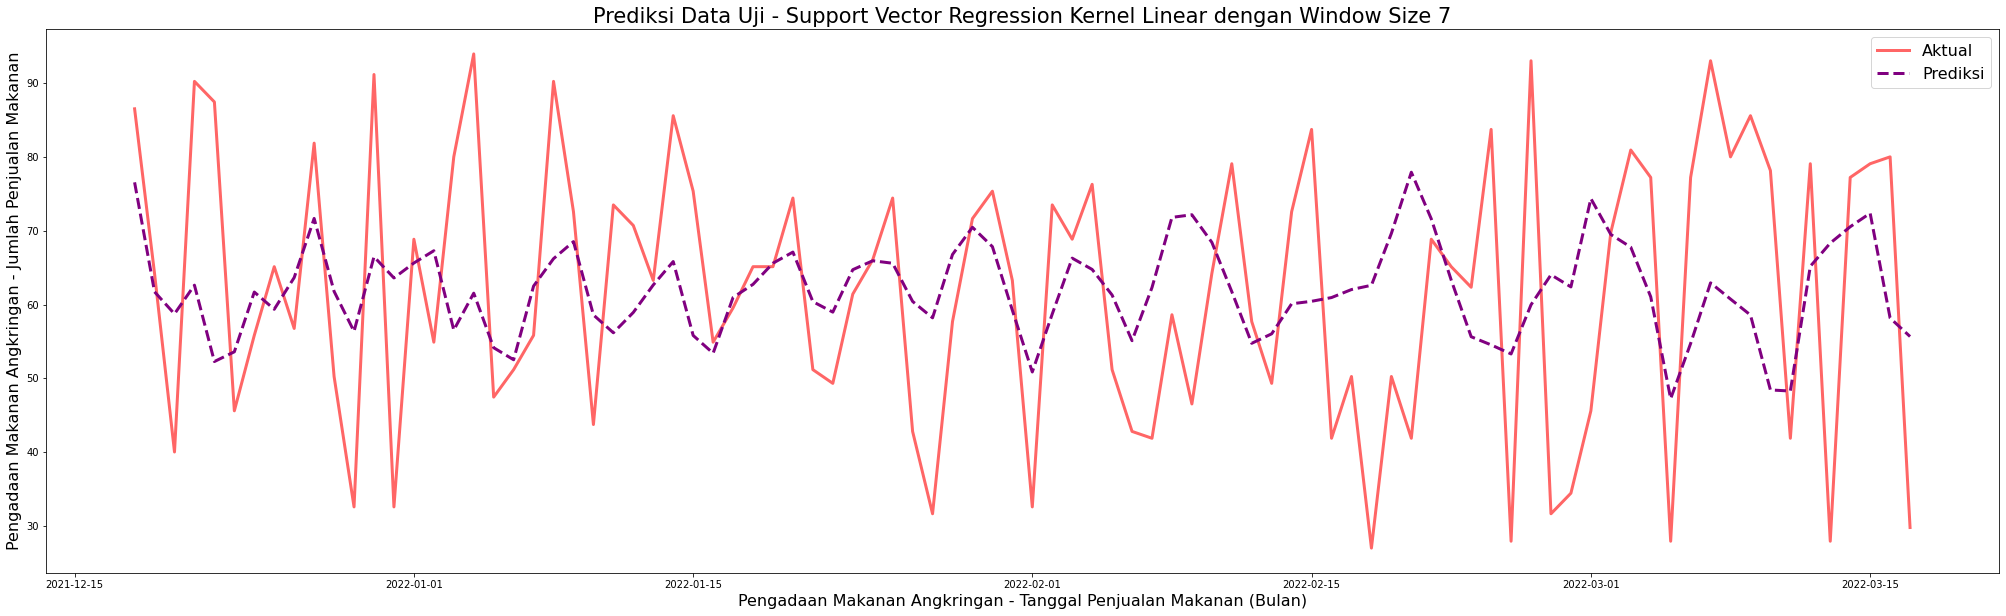

In [ ]:
plt.figure(figsize=(35,10))
plt.plot(test_timestamps, yTest, color = 'red', linewidth=3.0, alpha = 0.6)
plt.plot(test_timestamps, yTestLinearScale, linestyle='--', color='purple', linewidth=3.0)
plt.legend(['Aktual', 'Prediksi'], fontsize=16)
plt.xlabel('Pengadaan Makanan Angkringan - Tanggal Penjualan Makanan (Bulan)', fontsize=16)
plt.ylabel('Pengadaan Makanan Angkringan - Jumlah Penjualan Makanan', fontsize=16)
plt.title("Prediksi Data Uji - Support Vector Regression Kernel Linear dengan Window Size "+str(timesteps), fontsize=21)
plt.show()

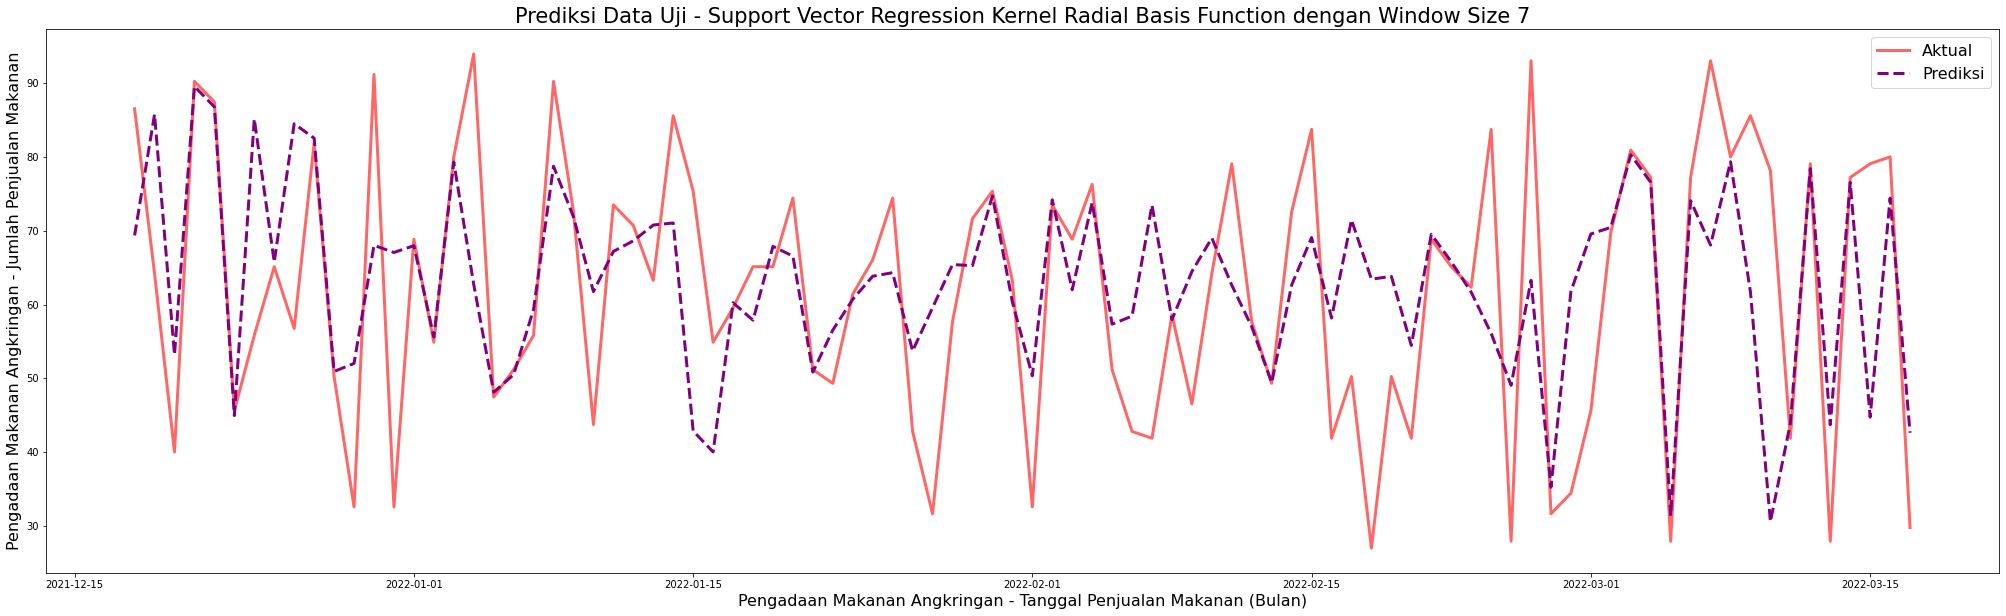

In [ ]:
plt.figure(figsize=(35,10))
plt.plot(test_timestamps, yTest, color = 'red', linewidth=3.0, alpha = 0.6)
plt.plot(test_timestamps, yTestRbfScale, linestyle='--', color = 'purple', linewidth=3.0)
plt.legend(['Aktual', 'Prediksi'], fontsize=16)
plt.xlabel('Pengadaan Makanan Angkringan - Tanggal Penjualan Makanan (Bulan)', fontsize=16)
plt.ylabel('Pengadaan Makanan Angkringan - Jumlah Penjualan Makanan', fontsize=16)
plt.title("Prediksi Data Uji - Support Vector Regression Kernel Radial Basis Function dengan Window Size "+str(timesteps), fontsize=21)
plt.show()

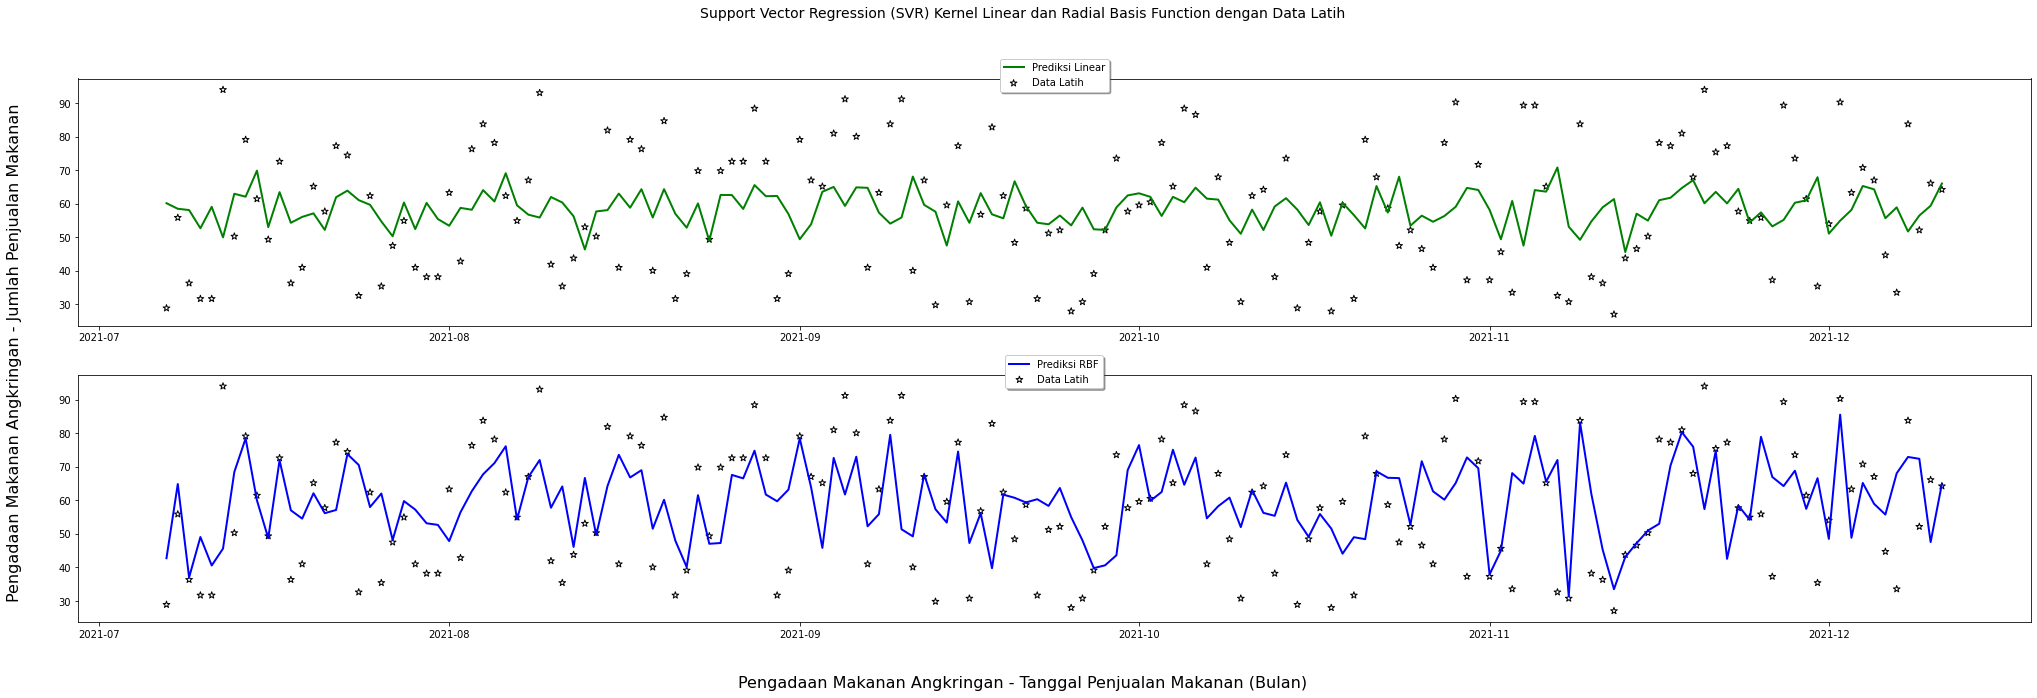

In [ ]:
lw = 2

svrs = [modelLinear, modelRbf]
kernel_label = ["Linear", "RBF"]
model_color = ["g", "b"]
modelEval = [yTrainLinearScale, yTrainRbfScale]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(35, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        train_timestamps, modelEval[ix],
        color=model_color[ix],
        lw=lw,
        label="Prediksi {}".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        train_timestamps, yTrain,
        facecolor="none",
        edgecolor='black',
        marker='*',
        s=50,
        label="Data Latih",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "Pengadaan Makanan Angkringan - Tanggal Penjualan Makanan (Bulan)", ha="center", va="center", fontsize=16)
fig.text(0.1, 0.5, "Pengadaan Makanan Angkringan - Jumlah Penjualan Makanan", ha="center", va="center", rotation="vertical", fontsize=16)
fig.suptitle("Support Vector Regression (SVR) Kernel Linear dan Radial Basis Function dengan Data Latih", fontsize=14)
plt.show()

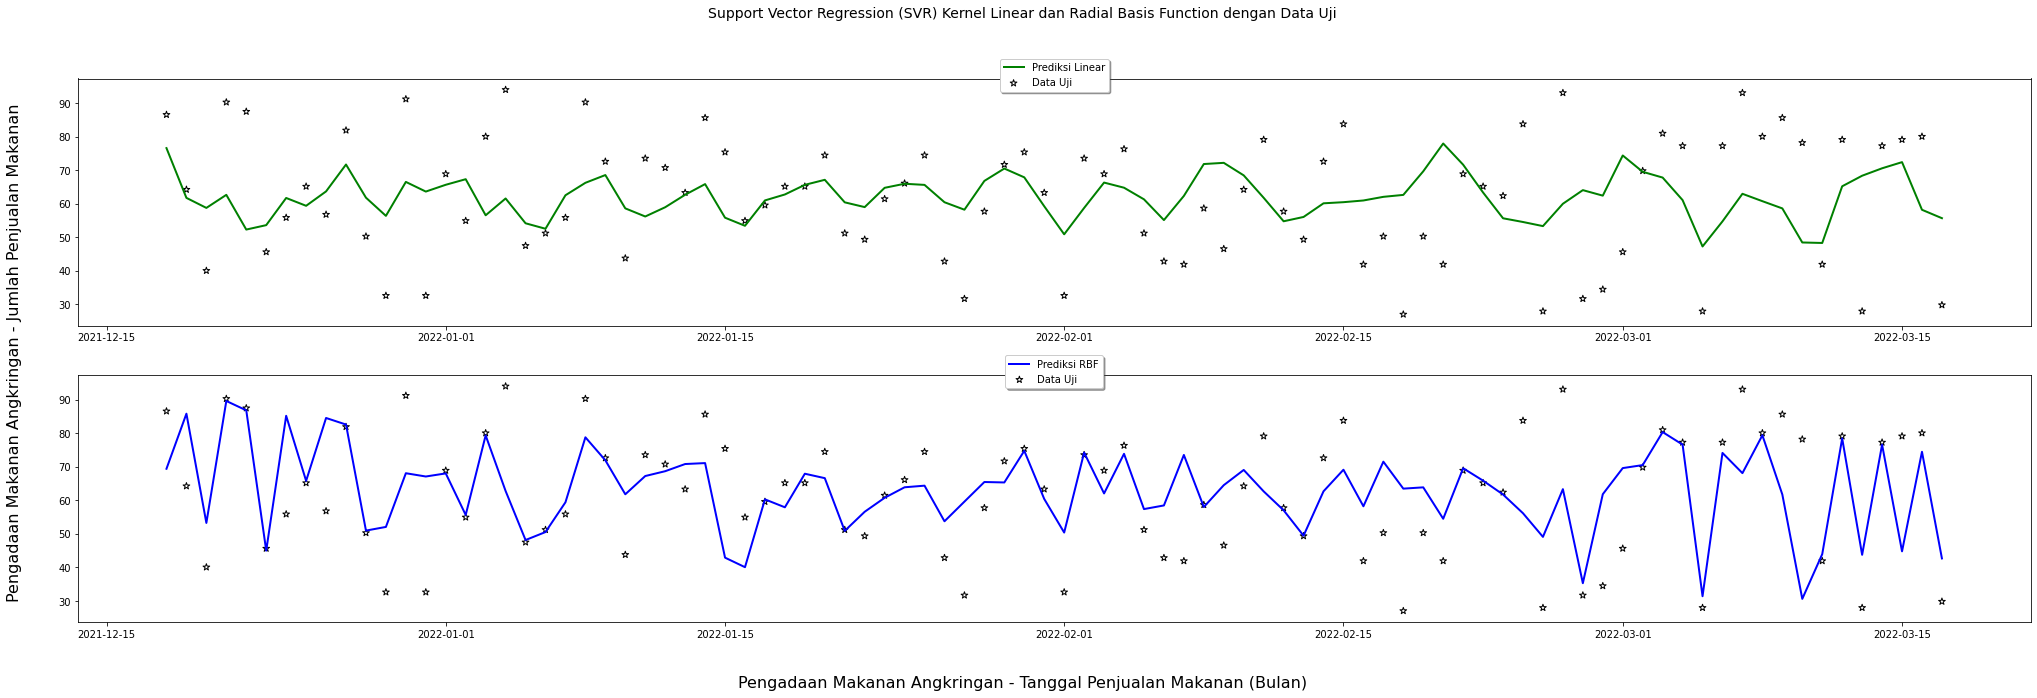

In [ ]:
lw = 2

svrs = [modelLinear, modelRbf]
kernel_label = ["Linear", "RBF"]
model_color = ["g", "b"]
modelEval = [yTestLinearScale, yTestRbfScale]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(35, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        test_timestamps, modelEval[ix],
        color=model_color[ix],
        lw=lw,
        label="Prediksi {}".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        test_timestamps, yTest,
        facecolor="none",
        marker='*',
        edgecolor='black',
        s=50,
        label="Data Uji",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "Pengadaan Makanan Angkringan - Tanggal Penjualan Makanan (Bulan)", ha="center", va="center", fontsize=16)
fig.text(0.1, 0.5, "Pengadaan Makanan Angkringan - Jumlah Penjualan Makanan", ha="center", va="center", rotation="vertical", fontsize=16)
fig.suptitle("Support Vector Regression (SVR) Kernel Linear dan Radial Basis Function dengan Data Uji", fontsize=14)
plt.show()

In [ ]:
import random

def wmape(a, f, d):

  if len(a) < 0 and len(f) < 0:
    print("is not array")

  w = []
  if d == 1: w = [random.uniform(1, 3) for _ in range(len(a))]
  elif d == 2: w = [random.gauss(1, 3) for _ in range(len(a))]
  else: w = [random.randint(1, 3) for _ in range(len(a))]

  forecastWeight = []
  actualWeight = []

  result = []
  for i in range(len(a)):
    forecastWeight.append(w[i]*abs(a[i] - f[i]))
    actualWeight.append(w[i]*a[i])

  return sum(forecastWeight)/sum(actualWeight)

In [ ]:
wmapeTrainLinear = wmape(yTrain, yTrainLinearScale, 3)
wmapeTrainRbf = wmape(yTrain, yTrainRbfScale, 3)
wmapeTrainLinear = wmape(yTrain, yTrainLinearScale, 3)
wmapeTrainRbf = wmape(yTrain, yTrainRbfScale, 3)

wmapeTestLinear = wmape(yTest, yTestLinearScale, 3)
wmapeTestRbf = wmape(yTest, yTestRbfScale, 3)
wmapeTestLinear = wmape(yTest, yTestLinearScale, 3)
wmapeTestRbf = wmape(yTest, yTestRbfScale, 3)

# compareLinerRbf = pd.DataFrame({"Train Linear" : wmapeTrainLinear,
#                                 "Train Radial Basis Function" : wmapeTrainRbf,
#                                 "Test Linear": wmapeTestLinear,
#                                 "Test Radial Basis Function": wmapeTestRbf})

compareLinerRbf = pd.DataFrame({
    "Model": ['Train','Test'],
    "Linear":[wmapeTrainLinear[0]*100, wmapeTestLinear[0]*100],
    "RBF" : [wmapeTrainRbf[0]*100, wmapeTestRbf[0]*100]})

print("Window Size {} ".format(timesteps))
display(compareLinerRbf)

Window Size 7 


,Model,Linear,RBF
0,Train,26.794870,22.371123
1,Test,24.579928,17.030233


In [ ]:
import math

def get_random_weight(a, d):
  w = []
  if d == 1: w = [random.uniform(1, 3) for _ in range(len(a))]
  elif d == 2: w = [random.gauss(1, 3) for _ in range(len(a))]
  # else: w = [math.log(a[i]+1) + 1 for i in range(len(a))]
  else: w = [random.randint(1, 3) for _ in range(len(a))]

  return w

def wrmspe(a, f, w):
  
  if len(a) < 0 and len(f) < 0:
    print("is not array")

  # w = []
  # if d == 1: w = [random.uniform(1, 3) for _ in range(len(a))]
  # elif d == 2: w = [random.gauss(1, 3) for _ in range(len(a))]
  # else: w = [math.log(a[i]+1) + 1 for i in range(len(a))]
  # else: w = [random.randint(1, 3) for _ in range(len(a))]

  gap = []
  for i in range(len(a)):
    gap.append(w[i]*(abs(a[i] - f[i])**2))
    # gap.append(w[i]*((abs(a[i] - f[i])/a[i])**2))
    
  return math.sqrt(abs(sum(gap)/len(a)))

In [ ]:
weight_distr_0 = get_random_weight(yTrain, 0)
weight_distr_1 = get_random_weight(yTrain, 1)
weight_distr_2 = get_random_weight(yTrain, 2)

wrmseRbf_0 = wrmspe(yTrain, yTrainRbfScale, weight_distr_0)
wrmseRbf_1 = wrmspe(yTrain, yTrainRbfScale, weight_distr_1)
wrmseTrRbf_2 = wrmspe(yTrain, yTrainRbfScale, weight_distr_2)
wrmseTrainRbf = wrmseTrRbf_2

wrmseLinear_0 = wrmspe(yTrain, yTrainLinearScale, weight_distr_0)
wrmseLinear_1 = wrmspe(yTrain, yTrainLinearScale, weight_distr_1)
wrmseTrLinear_2 = wrmspe(yTrain, yTrainLinearScale, weight_distr_2)
wrmseTrainLinear = wrmseTrLinear_2

wrmseRbf_0 = wrmspe(yTest, yTestRbfScale, weight_distr_0)
wrmseRbf_1 = wrmspe(yTest, yTestRbfScale, weight_distr_1)
wrmseTsRbf_2 = wrmspe(yTest, yTestRbfScale, weight_distr_2)
wrmseTestRbf = wrmseTsRbf_2

wrmseLinear_0 = wrmspe(yTest, yTestLinearScale, weight_distr_0)
wrmseLinear_1 = wrmspe(yTest, yTestLinearScale, weight_distr_1)
wrmseTsLinear_2 = wrmspe(yTest, yTestLinearScale, weight_distr_2)
wrmseTestLinear = wrmseTsLinear_2

evalTable = pd.DataFrame({"RBF" : {"wrmspe_0":wrmseRbf_0,
                                   "wrmspe_1":wrmseRbf_1,
                                   "wrmspe_2":wrmseTrRbf_2},
                         "Linear" : {"wrmspe_0":wrmseLinear_0,
                                     "wrmspe_1":wrmseLinear_1,
                                     "wrmspe_2":wrmseTsLinear_2
                          }})

display(evalTable)

,RBF,Linear
wrmspe_0,22.399982,25.124488
wrmspe_1,21.238012,25.860879
wrmspe_2,15.045478,11.267312


In [ ]:
evalTrainTable = pd.DataFrame({"WMAPE" : {"Linear Train" :wmapeTrainLinear[0]*100,
                                   "RBF Train":wmapeTrainRbf[0]*100},
                         "WRMSE" : {"Linear Train" :wrmseTrainLinear,
                                     "RBF Train":wrmseTrainRbf}})
display(evalTrainTable)

,WMAPE,WRMSE
Linear Train,26.794870,16.846185
RBF Train,22.371123,15.045478


In [ ]:
evalTestTable = pd.DataFrame({"WMAPE" : {"Linear Test" :wmapeTestLinear[0]*100,
                                   "RBF Test":wmapeTestRbf[0]*100},
                         "WRMSE" : {"Linear Test" :wrmseTestLinear,
                                     "RBF Test":wrmseTestRbf}})
display(evalTestTable)

,WMAPE,WRMSE
Linear Test,24.579928,11.267312
RBF Test,17.030233,11.783847


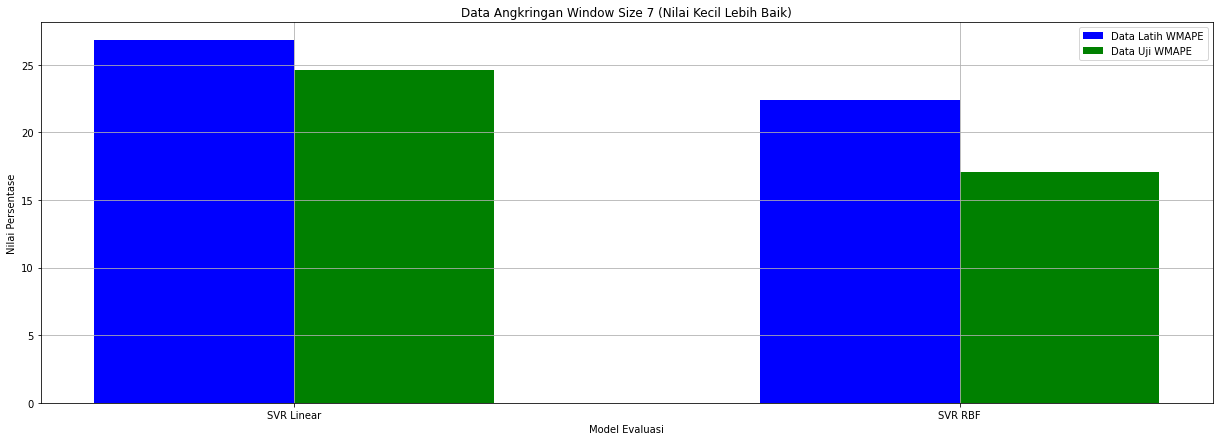

In [ ]:
evalTrainWmape = [wmapeTrainLinear[0]*100,  wmapeTrainRbf[0]*100]
evalTestWmape = [wmapeTestLinear[0]*100,  wmapeTestRbf[0]*100]

barWidth = 0.3
brTrainWmape = np.arange(len(evalTrainWmape))
brTestWmape = [x + barWidth for x in brTrainWmape]

fig = plt.subplots(figsize =(21, 7))
plt.bar(brTrainWmape, evalTrainWmape, color='b', width=barWidth, label='Data Latih WMAPE')
plt.bar(brTestWmape, evalTestWmape, color='g', width=barWidth, label='Data Uji WMAPE')
plt.xlabel('Model Evaluasi')
plt.ylabel('Nilai Persentase')
plt.xticks([r+0.15 for r in range(len(evalTrainWmape))],['SVR Linear', 'SVR RBF'])
plt.title('Data Angkringan Window Size '+str(timesteps)+' (Nilai Kecil Lebih Baik)')
plt.legend()
plt.grid()
plt.show()

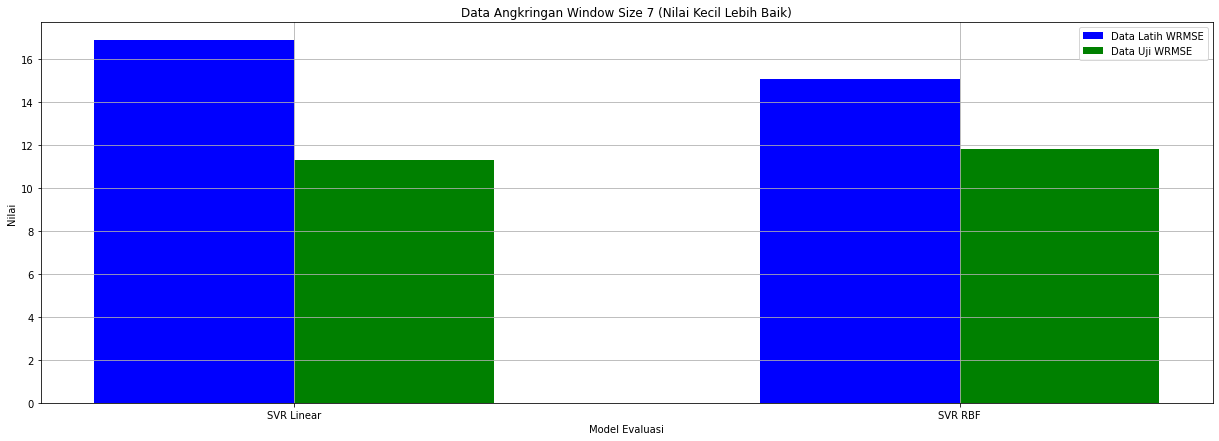

In [ ]:
evalTrainWrmse = [wrmseTrainLinear, wrmseTrainRbf]
evalTestWrmse = [wrmseTestLinear, wrmseTestRbf]

barWidth = 0.3
brTrainWrmse = np.arange(len(evalTrainWrmse))
brTestWrmse = [x + barWidth for x in brTrainWrmse]

fig = plt.subplots(figsize =(21, 7))
plt.bar(brTrainWrmse, evalTrainWrmse, color='b', width=barWidth, label='Data Latih WRMSE')
plt.bar(brTestWrmse, evalTestWrmse, color='g', width=barWidth, label='Data Uji WRMSE')
plt.xlabel('Model Evaluasi')
plt.ylabel('Nilai')
plt.xticks([r+0.15 for r in range(0, len(evalTrainWmape))],['SVR Linear', 'SVR RBF'])
plt.title('Data Angkringan Window Size '+str(timesteps)+' (Nilai Kecil Lebih Baik)')
plt.legend()
plt.grid()
plt.show()

## Calculate Efisiensi Food of Angkringan

1. call model
2. insert count of product angkringan (14 days)
3. calculate gap average both of predict with stocking (14 days)

In [ ]:
x_efficient, y_efficient = efficient_data_timesteps[:,:timesteps-1],efficient_data_timesteps[:,[timesteps-1]]

# convert for graphic
efficientScale = mScaler.inverse_transform(y_efficient).reshape(-1, 1)
print(x_efficient.shape, efficientScale.shape)
print(efficient_data_timesteps.shape)
print(len(efficient_timestamps), len(y_efficient))

[102 105 101 103 103 100  98]
(7, 6) (7, 1)
(7, 7)
7 7


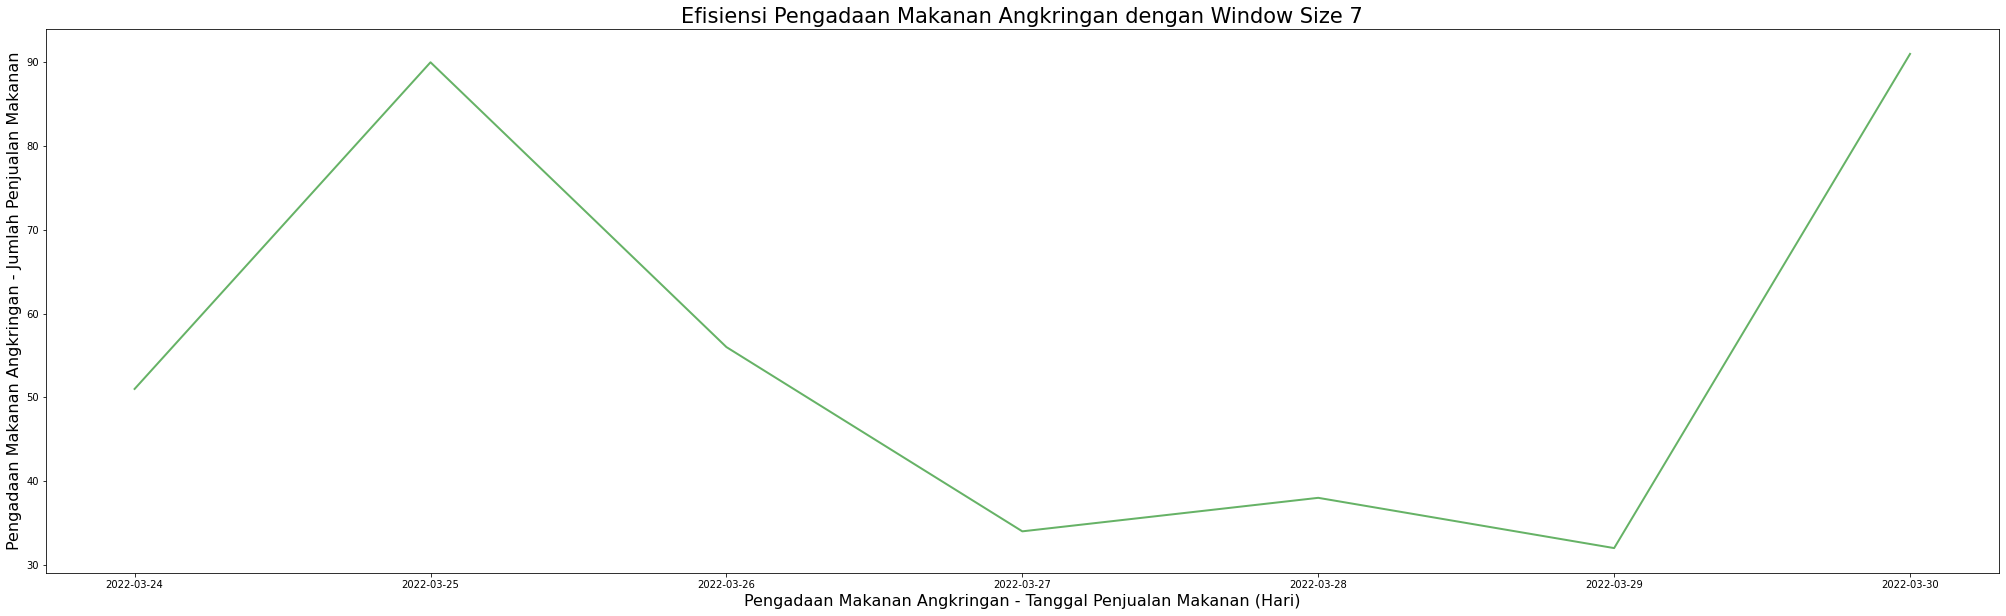

In [ ]:
plt.figure(figsize=(35,10))
# plt.plot(efficient_timestamps, efficient_data, color = 'green', linewidth=2.0, alpha = 0.6)
plt.plot(efficient_timestamps, efficientScale, color = 'green', linewidth=2.0, alpha = 0.6)
# plt.legend(['Jumlah Pengadaan Makanan Angkringan'], fontsize=16)
plt.xlabel('Pengadaan Makanan Angkringan - Tanggal Penjualan Makanan (Hari)', fontsize=16)
plt.ylabel('Pengadaan Makanan Angkringan - Jumlah Penjualan Makanan', fontsize=16)
plt.title("Efisiensi Pengadaan Makanan Angkringan dengan Window Size "+str(timesteps), fontsize=21)
plt.show()

In [ ]:
# make model linear prediction
efficientLinear = modelLinear.predict(x_efficient).reshape(-1, 1)
# print(efficientLinear)

# make model rbf prediction
efficientRbf = modelRbf.predict(x_efficient).reshape(-1, 1)
# print(efficientRbf)

efficientLinearScale = mScaler.inverse_transform(efficientLinear).reshape(-1, 1)
efficientRbfScale = mScaler.inverse_transform(efficientRbf).reshape(-1, 1)
efficientTargetScale = mScaler.inverse_transform(y_efficient).reshape(-1, 1)

print(len(efficientTargetScale), len(y_efficient), len(efficient_timestamps))
# display({"linear":efficientLinearScale,"RBF":efficientRbfScale, "Target":efficientTargetScale})

7 7 7


In [ ]:
resultLinear = []
resultRbf = []

for i in range(len(efficientLinearScale)):
  resultLinear.append(efficientLinearScale[i]-efficientTargetScale[i])
  resultRbf.append(efficientRbfScale[i]-efficientTargetScale[i])

resultDemandLinear = sum(resultLinear)/len(resultLinear)
resultDemandRbf = sum(resultRbf)/len(resultRbf)
roundDemandLinear = round(resultDemandLinear[0], 2)
roundDemandRbf = round(resultDemandRbf[0],2)

realDemand = demandSeries[:len(y_efficient)].values
efficientStock = stockSeries[:len(y_efficient)].values
realWaste = wasteSeries[:len(y_efficient)].values

print(efficientStock, realWaste)

stockFivePercentLinear = [] 
stockFivePercentRbf = []

for i in range(len(efficientStock)):
  stockFivePercentLinear.append(efficientStock[i]-efficientLinearScale[i])
  stockFivePercentRbf.append(efficientStock[i]-efficientRbfScale[i])

resultSFPL = sum(stockFivePercentLinear)/len(stockFivePercentLinear)
resultSFPR = sum(stockFivePercentRbf)/len(stockFivePercentRbf)
roundSFPL = round(resultSFPL[0], 2)
roundSFPR = round(resultSFPR[0], 2)

resultWaste = sum(realWaste)/len(realWaste)
roundRW = round(resultWaste, 2)

display(pd.DataFrame({"selisih rata-rata prediksi dengan aktual": 
                      {"Linear": roundDemandLinear,
                      "RBF": roundDemandRbf}, 
                      "selisih rata - rata prediksi dengan pengadaan sate":
                      {"Linear":roundSFPL,"RBF":roundSFPR}}
                     ))

display(pd.DataFrame({"selisih rata - rata prediksi dan aktual dengan pengadaan sate":
                      {"Linear":roundSFPL,"RBF":roundSFPR, "Aktual":roundRW}}
                     ))

[102 105 101 103 103 100  98] [32 39 78 79 57 42 73]


,selisih rata-rata prediksi dengan aktual,selisih rata - rata prediksi dengan pengadaan sate
Linear,5.55,40.16
RBF,-1.39,47.11


,selisih rata - rata prediksi dan aktual dengan pengadaan sate
Aktual,57.14
Linear,40.16
RBF,47.11


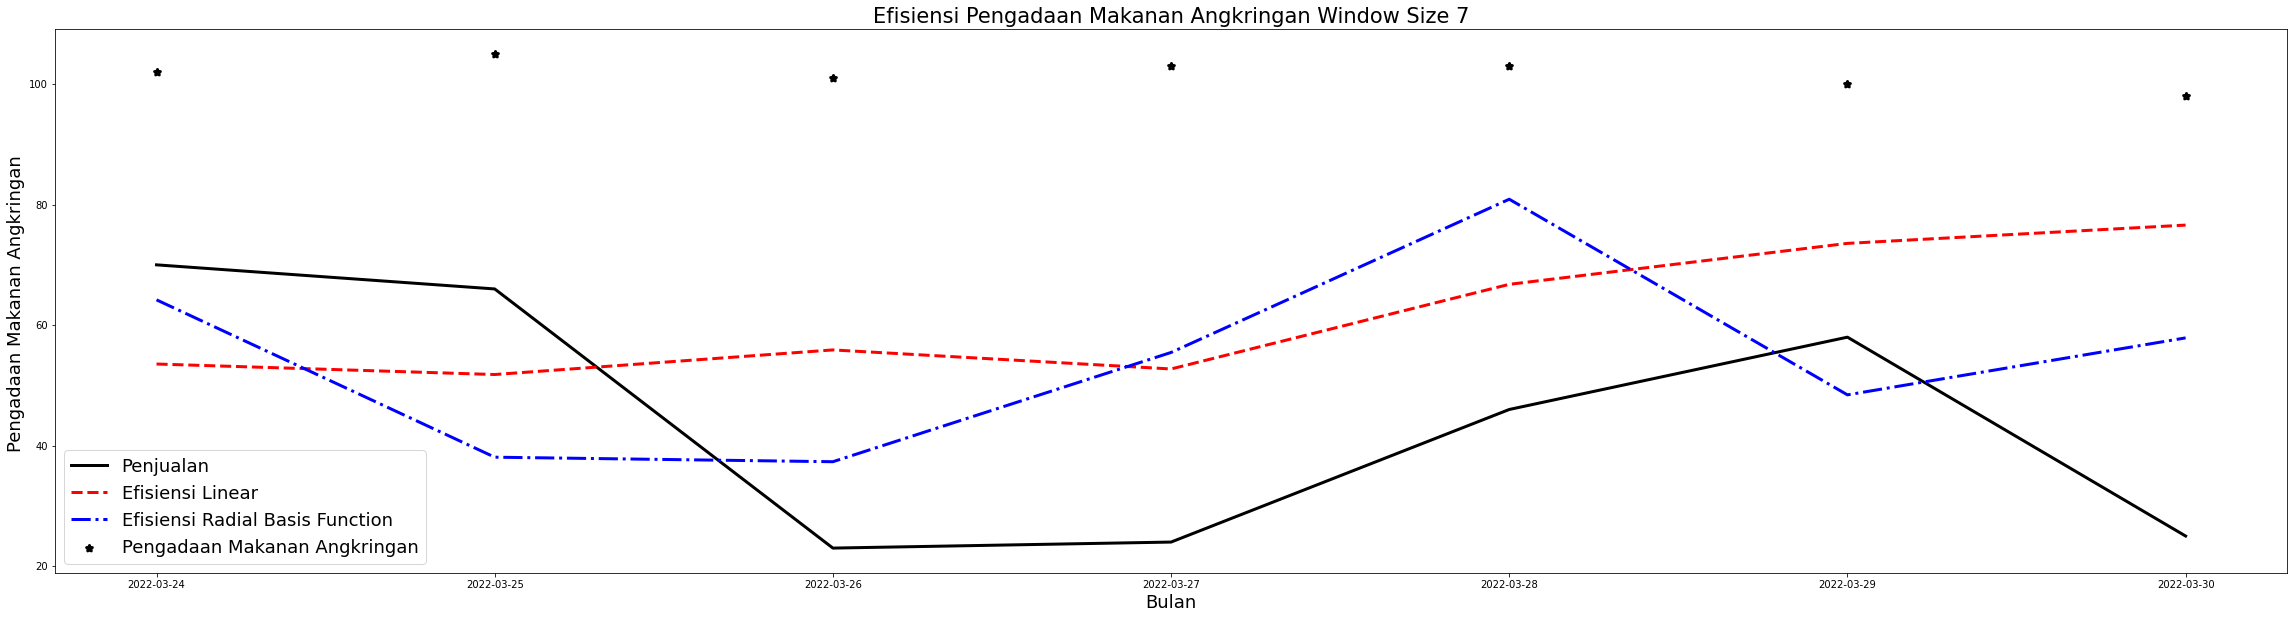

In [ ]:
plt.figure(figsize=(40,10))
# plt.scatter(efficient_timestamps, efficientTargetScale, color='black', marker='*', linewidth=3.0)
plt.scatter(efficient_timestamps, efficientStock, color='black', marker='*', linewidth=3.0)
plt.plot(efficient_timestamps, realDemand, color='black', linewidth=3.0)
plt.plot(efficient_timestamps, efficientLinearScale, 'r--', linewidth=3.0)
plt.plot(efficient_timestamps, efficientRbfScale, 'b-.', linewidth=3.0)
plt.legend(['Penjualan','Efisiensi Linear','Efisiensi Radial Basis Function','Pengadaan Makanan Angkringan'], fontsize=18)
plt.xlabel('Bulan', fontsize=18)
plt.ylabel('Pengadaan Makanan Angkringan ', fontsize=18)
plt.title("Efisiensi Pengadaan Makanan Angkringan Window Size "+str(timesteps), fontsize=21)
plt.show()

#Reference 2 : SVR
ref:https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Regression/Support%20Vector%20Regression.ipynb

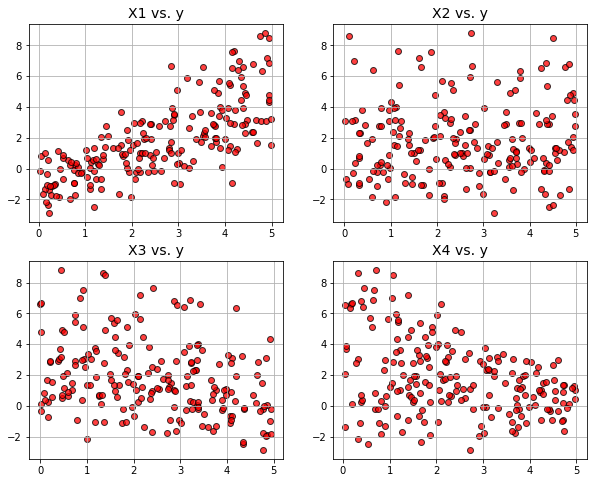

RMSE for linear SVR: 1.3985039619441344
RMSE for RBF kernelized SVR: 1.2755086394809936
Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, error_score='raise-deprecating', estimator=SVR(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5],
                         'epsilon': [0.1, 0.2, 0.5, 1]},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:

# Support vector regression
# Dr. Tirthajyoti Sarkar, Fremont, CA 94536
# Here is the nice article how support vector method can also be used for regression.

# https://www.saedsayad.com/support_vector_machine_reg.htm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# A simple nonlinear function
# The aim is to create some synthetic data which is not very amenable for linear regression models. We will show how a Support Vector regressor enhances the predictive performance.

def nonlinear(array):
    return (10*array[:,0]-np.exp(0.01*array[:,1]+np.log(1+array[:,2]**2)))/(array[:,3]**2+5)

# Generate features and target data for regression
n_samples = 200
n_features = 4
x = 5*np.random.rand(n_samples,n_features)
y = nonlinear(x)+np.random.randn(n_samples)
y=y.reshape(n_samples,1)
df = pd.DataFrame(data=np.hstack((x,y)),columns=['X1','X2','X3','X4','y'])
df.head()

# X1	X2	X3	X4	y
# 0	0.818477	4.027099	1.131048	0.024221	2.540776
# 1	1.250933	1.458881	0.978987	0.903619	2.602005
# 2	4.878818	4.814252	1.773927	1.382003	4.243708
# 3	4.770039	2.108497	1.250745	2.135227	3.721822
# 4	3.315885	4.742257	1.846138	3.843564	1.268514

# Plotting the data
fig,ax = plt.subplots(2,2,figsize=(10,8))
ax = ax.ravel()
for i in range(4):
    ax[i].scatter(df[df.columns[i]],df['y'],edgecolor='k',color='red',alpha=0.75)
    ax[i].set_title(f"{df.columns[i]} vs. y",fontsize=14)
    ax[i].grid(True)
plt.show()

# Test/train split
X = df[['X1','X2','X3','X4']]
y = df['y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Support vector regressor with linear kernel
# Here is scikit-learn's SVR doc: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

from sklearn.svm import SVR
svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
svr_linear.fit(X_train, y_train) 
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Test score

svr_linear.score(X_test,y_test)
# 0.5039103904226544

# Linear regression as a baseline
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
linear.score(X_test,y_test)
# 0.5131204583471316

# Support vector regressor with Gaussian (radial basis function) kernel
svr_rbf = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_rbf.fit(X_train, y_train) 
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svr_rbf.score(X_test,y_test)
# 0.6473177483091139

# So, clearly, the RBF kernel showed better accuracy on the test set

from sklearn.metrics import mean_squared_error
print("RMSE for linear SVR:",np.sqrt(mean_squared_error(y_test,svr_linear.predict(X_test))))
print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_rbf.predict(X_test))))
# RMSE for linear SVR: 1.442957827502489
# RMSE for RBF kernelized SVR: 1.2166492012822947
# We can do a grid search of hyperparameters (with 5-fold cross-validation) to see if the test/validation score be improved

from sklearn.model_selection import GridSearchCV
params = {'C':[0.01,0.05,0.1,0.5,1,2,5],'epsilon':[0.1,0.2,0.5,1]}
grid = GridSearchCV(svr_rbf,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)
grid.fit(X_train,y_train)

# Fitting 5 folds for each of 28 candidates, totalling 140 fits
# [Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
# [Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.4s finished
# c:\program files\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
#   DeprecationWarning)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False), n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5],
                         'epsilon': [0.1, 0.2, 0.5, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [ ]:
# Check which was deemed best estimator by the grid search
grid.best_estimator_

SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.5, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Fit that estimator to the data and see
svr_best=SVR(kernel='rbf',gamma='scale', C=5.0, epsilon=0.5)
svr_best.fit(X_train, y_train)
SVR(C=5.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.5, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svr_best.score(X_test,y_test)
# 0.6776661577094625
print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_best.predict(X_test))))
# RMSE for RBF kernelized SVR: 1.163125361525394

RMSE for RBF kernelized SVR: 1.1148490463175138
